<span style="font-size: 6px; float:right">Notebook created by Mieszko Fraś
<br>
<center><font size="6"><b>Digital Signal Processing Lab</b></font></center>
<br />
<center><font size="5"><b><u>LTI Systems</u></b></font></center>


My name is Mariusz Więcławek.
If you have collaborated with other peers while working on this notebooke, please annouce theirs names below.
- Adrian Kortyla

# Introduction

LTI systems are those that are both linear and time-invariant. In this notebook, you will have to implement some exercises that will introduce you to the basics of LTI systems operation. 


## Reading list

Before working with the notebook, you might find it useful to become acquainted with the following materials:
- <span style="font-size: 12px">Section **1.3.6 Splot sygnałów** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **10.1 Układy dyskretne LTI** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **10.3 Transformacja Z** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **10.4 Odwrotna transformacja Z** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **10.5 Właściwości transformacji Z** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **10.6 Transmitancja układów dyskretnych** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span> 

# Necessary Pythons's imports

You should not import anything else in order to complete exercises in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches

# Practical problem set

## Zero padding

Zero padding is a simple and often used concept, it refers to adding zeros at the end of a time-domain signal to increase its length. There are a few reasons why you might want to zero pad time-domain data. The most common reason is to make a signal have a power-of-two number of samples. When the time-domain length of a signal is a power of two, radix-2 FFT algorithms, which are extremely efficient, can be used to speed up processing time.

Other uses of zero padding include:
- Adding zeros is equal to interpolating samples of your spectrum with sinc function. Therefore you will find it looking more smoothly. 
- If some peaks were split between two bins, these can be interpolated to some extend and you might be able to retrieve some amplitude information thanks to that.
- If you are trying to plot frequency response of some FIR filter from it's impulse response then you need to add zeros to it. Otherwise you will get as many samples as the length of filter is and this may not be enough.
- If you are trying to convolve your signal with some pattern using FFT, then you need to pad your signals with zeros to the appropriate length. Otherwise result of convolution will be incorrect (replicas in frequency domain will overlap).

### Exercise 

Implement a function that will add zeros to the end of the given signal in such a way, that the output is the length of the nearest, greater power of two.

In [13]:
def zero_padd(signal):
    """
    This function should pad input signal with zeros to the length of the nearest, greater power of two.
   
    Parameters
    ----------
    signal: Numpy array of random length containing first signal.
    
    Returns
    -------
    X: numpy array containing zero-padded signal.

    """
    i=0
    X=signal
    while 2**i <len(signal):
        i+=1
    temp=[0]*(2**i-len(signal))
    X=np.append(signal,temp)

    return X

Verify your implementation

Your implementation succeeded


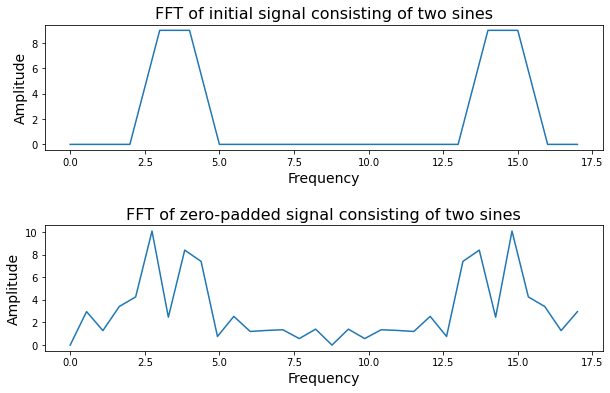

In [14]:
# Do not change anything in the code below

fs = np.random.randint(17,21) # Sampling frequency

dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate signal consisting of two sines
signal = np.sin(2*np.pi*t*3) + np.sin(2*np.pi*t*4)

# Zero padding using your implementation
X = zero_padd(signal)

# Check length of the singal
print('Your implementation succeeded' if np.log2(X.shape[0])%1==0 else 'Length of signal (' + str(X.shape[0]) + ') is not a power of 2!')

# Ploting FFT of initial signal and result
plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.plot(np.linspace(0,fs-1,fs), np.abs(np.fft.fft(signal)))
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.title('FFT of initial signal consisting of two sines', fontsize = 16)

plt.subplot(2,1,2)
plt.plot(np.linspace(0,fs-1,X.shape[0]), np.abs(np.fft.fft(X)))
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.title('FFT of zero-padded signal consisting of two sines', fontsize = 16)
plt.subplots_adjust(hspace = 0.6)
plt.show()

### Question 

- What is the difference between power spectrum of input signal and the power spectrum of zero-padded signal?
- What the unwanted effect of zero padding may be? 

Wartości mocy widma dla obu sygnałów znacznie się różnią. W sygnale zero-padded moc widma przyjmuje wartości większe od 0 w przeciwieństwie do sygnału bez uzupełnienia zerami. Sygnał powinien mieć widoczne wartości amplitud dla częstotliwości 3 oraz 4 Hz. Niestety nie widać tego na wykresie bez uzupełnienia zerami.

## Discrete linear convolution

### Exercise 

Implement [discrete linear convolution](https://en.wikipedia.org/wiki/Convolution#Discrete_convolution) operation.

<div style="border: solid; padding: 20px">
<b style="font-size: 12pt">Discrete linear convolution </b>
$$\large
    (\mathbf{f} \ast \mathbf{g})[n] = \sum_{m=-M}^{M} \mathbf{f}[n-m]\mathbf{g}[m]
$$
</div>

In [4]:
def conv(f,g):
    """
    This function should calculate linear convolution of two signals in the time domain.
   
    Parameters
    ----------
    f: Numpy array of shape (N, ) containing first signal.
    g: Numpy array of shape (M, ) containing first signal.
    
    Returns
    -------
    X: numpy array of shape (N+M-1,) containing convoluted signals.

    """
    N = f.shape[0]
    M = g.shape[0]
    X = np.zeros((N + M -1))    
    for k in range(N + M -1):
        temp=0
        for m in range(M):
            if k-m >=0 and k-m < N:
                temp += g[m]*f[k-m]
        X[k]=temp
    return X

Verify your implementation

In [5]:
# Do not change anything in the code below

fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
f = np.random.randn(*t.shape)

# Generate FIR coefs
g = np.array([-0.0101, -0.0260, -0.0027, 0.1071, 0.2626, 0.3385, 0.2626, 0.1071, -0.0027, -0.0260, -0.0101])

# Compute convolution using your implementation
X = conv(f,g)

# Compute convolution using reference implementation from numpy
X_ref = np.convolve(f,g)

# Error between your implementation and reference implementation
X_err = np.abs(X - X_ref)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

RMSE: 0.0
Your implementation succeeded


## Discrete convolution using Fourier Transform

[Fourier transform theorem](https://en.wikipedia.org/wiki/Fourier_transform#Convolution_theorem) tells us, that convolution of two signals corresponds to multiplication of the corresponding Fourier transforms. In previous notebooks you learned higly efficient algorithms for computing the DFT. Becouse of these algorithms it is computionally efficient to implement a convolution of two signals by computing the DFTs, multiplying them, and then computing the IDFT. 

The circular_conv function below shows how to calculate circular convolution using DFT. An essential part is to zero-padd shorter signal, to the length of the longer one.

In [6]:
def circular_conv(f,g):        
    N = f.shape[0]
    M = g.shape[0]
    
    K = np.maximum(N,M)
    if K > N:
        f_padded = np.concatenate((f, np.zeros((K-N,))))
        g_padded = g
    if K > M:
        g_padded = np.concatenate((g, np.zeros((K-M,))))
        f_padded = f
        
    F = np.fft.fft(f_padded)
    G = np.fft.fft(g_padded)
    Y = F * G
    X = np.real(np.fft.ifft(Y))
    return X

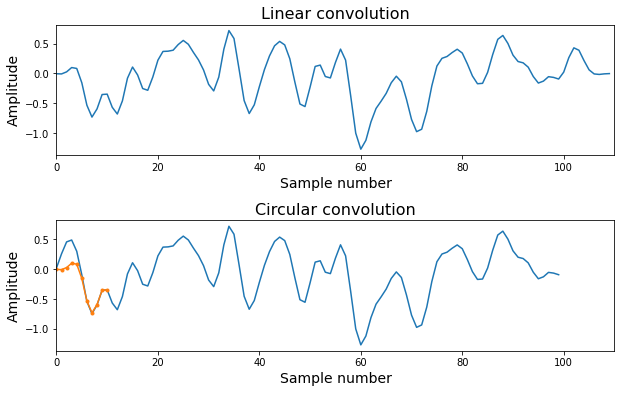

In [7]:
direct = conv(f,g)
plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.plot(direct)
plt.xlim(0,direct.shape[0])
plt.xlabel('Sample number', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.title('Linear convolution', fontsize = 16)

circular = circular_conv(f,g)
plt.subplot(2,1,2)
plt.plot(circular)
plt.xlim(0,direct.shape[0])
plt.xlabel('Sample number', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.title('Circular convolution', fontsize = 16)
plt.plot(direct[:g.shape[0]], '.-')
plt.subplots_adjust(hspace = 0.5)
plt.show()

### Question 

- Why the result of circular convolution is different then the result of linear convolution?
- How many samples (in general) are affected?

Pierwsze i ostatnie 10 próbek splotu kołowego różni się od splotu liniowego. Wynika to z charakterystyki splotu kołowego, która zapewnia okresowość wyniku operacji.

### Exercise 

Implement linear convolution using Fourier Transform. 

In [9]:
def linear_conv(f,g):
    """
    This function should calculate linear convolution of two signals in the frequency domain.
   
    Parameters
    ----------
    f: Numpy array of shape (N, ) containing first signal.
    g: Numpy array of shape (M, ) containing first signal.
    
    Returns
    -------
    X: numpy array of shape (N+M-1,) containing convoluted signals.

    """
    N = f.shape[0]
    M = g.shape[0]
    K=N+M-1 
    # dodawanie 0 na koniec (zero padding) dla sygnału f
    temp=[0]*(K-len(f))
    f=np.append(f,temp)
    # dodawanie 0 na koniec (zero padding) dla sygnału g
    temp=[0]*(K-len(g))
    g=np.append(g,temp)
    f_fft = np.fft.fft(f)
    g_fft = np.fft.fft(g)
    conv=f_fft*g_fft
    inverse_fft_fg = np.fft.ifft(conv)
    
    return inverse_fft_fg

Verify you implementation.

RMSE: 0.0
Your implementation succeeded


/spclass/miniconda3/envs/spclass/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/spclass/miniconda3/envs/spclass/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


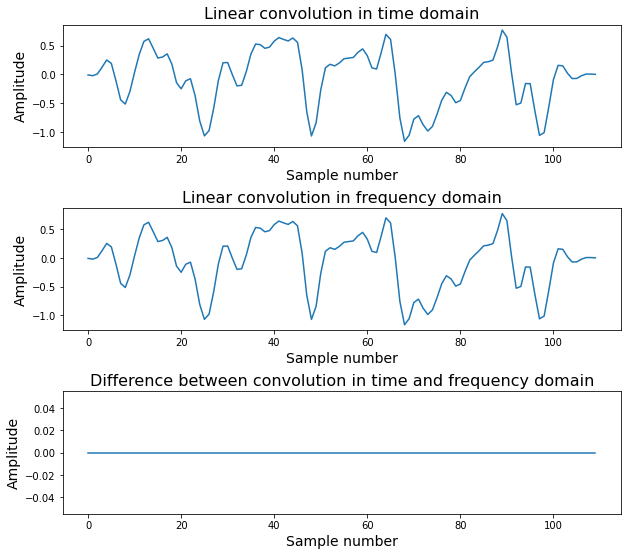

In [10]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
f = np.random.randn(*t.shape)

# Generate FIR coefs
g = np.array([-0.0101, -0.0260, -0.0027, 0.1071, 0.2626, 0.3385, 0.2626, 0.1071, -0.0027, -0.0260, -0.0101])

# Compute convolution using your implementation
X = linear_conv(f,g)

# Compute convolution using reference implementation from numpy
X_ref = np.convolve(f,g)

# Error between your implementation and reference implementation
X_err = np.abs(X - X_ref)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

# Ploting
direct = conv(f,g)
plt.figure(figsize = (10,9))
plt.subplot(3,1,1)
plt.plot(direct)
plt.xlabel('Sample number', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.title('Linear convolution in time domain', fontsize = 16)

linear = linear_conv(f,g)
plt.subplot(3,1,2)
plt.plot(linear)
plt.xlabel('Sample number', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.title('Linear convolution in frequency domain', fontsize = 16)

error = np.round(linear-direct, 15)
plt.subplot(3,1,3)
plt.plot(error)
plt.xlabel('Sample number', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.title('Difference between convolution in time and frequency domain', fontsize = 16)

plt.subplots_adjust(hspace = 0.5)
plt.show()

## Overlap Add

Consider an input data x[n] of length N and a filter h[n] of lenth M. The linear convolution of the two sequences has length (N+M-1). To avoid time aliasing, the DFT length must be at least (N+M-1). However, in many aplication, such as filtering speech, the length of the input data is of indefinite duration. Computing the DFT of the entire input singal in this case can be inpractical and will cause a long delay, since we need all samples of the input before filtering. The solution is to use block convolution, in which the inut signal is segmented into sections of length L. Then, we can use the DFT to convolve each section with the filter, and get the desired linear convolution by fitting the filtered sections. The two most popular methods are [Overlap-add](https://en.wikipedia.org/wiki/Overlap%E2%80%93add_method) and [Overlap-save](https://en.wikipedia.org/wiki/Overlap%E2%80%93save_method).


### Exercise 
Implement [Overlap-add Method](https://en.wikipedia.org/wiki/Overlap%E2%80%93add_method)

- Segment the input signal into sections of L, and convolve each section with the filter of length M.
- Perform linear convolution for each sequence (DFT of length (L+M-1) allow us to compute the convolution without time aliasing).
- The nonzero points in the filtered sections will overlap by (M-1) points, and these overlap points should be added together to construct the output.

In [11]:
def overlap_add(f, g, L = 64):
    """
    This function should calculate linear convolution of two signals using Overlapp-add method.
   
    Parameters
    ----------
    f: Numpy array of shape (N, ) containing first signal.
    g: Numpy array of shape (M, ) containing first signal.
    L: Int containing length of the single sequence.
    
    Returns
    -------
    X: numpy array of shape (N+M-1,) containing convoluted signals.

    """
    ########## Your code  goes here ##########
    
    P = g.shape[0]
    N = f.shape[0]
    step_size = L - (P - 1)
    G = np.fft.fft(g,L)
    position = 0
    X = np.zeros((N+P-1))
    while position + step_size <= N :
        X[position:position+L] = X[position:position+L] + np.real( np.fft.ifft(np.fft.fft(f[position:position+step_size],L) * G) )
        position += step_size
    
    X[position:] = X[position:] + np.real( np.fft.ifft(np.fft.fft(f[position:], N+P-1-position) * np.fft.fft(g,N+P-1-position)) )
    return X

RMSE: 0.0
Your implementation succeeded


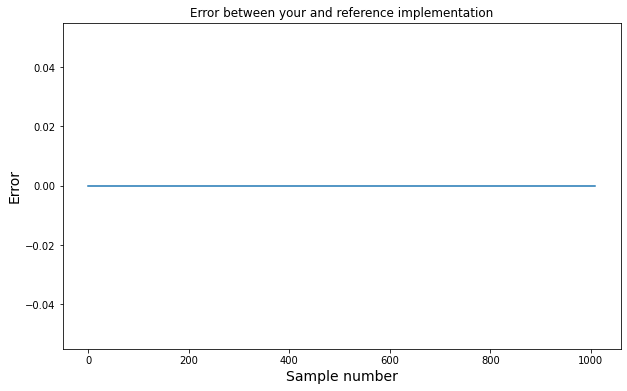

In [12]:
fs = 1e3 # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
f = np.random.randn(*t.shape)

# Generate FIR coefs
g = np.array([-0.0101, -0.0260, -0.0027, 0.1071, 0.2626, 0.3385, 0.2626, 0.1071, -0.0027, -0.0260, -0.0101])

# Sequence length
L = 64

# Compute convolution using your implementation
X = overlap_add(f,g,L)

# Compute convolution using reference implementation from numpy
X_ref = np.convolve(f,g)

# Error between your implementation and reference implementation
X_err = np.round(X - X_ref,15)

# RMSE
X_RMSE = np.sqrt(np.mean(X_err**2))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

# Ploting
linear = linear_conv(f,g)
plt.figure(figsize = (10,6))
plt.plot(X_err)
plt.xlabel('Sample number', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.title('Error between your and reference implementation')
plt.show()

## Z transform

Analysis of continuous time LTI systems can be done using z-transforms. It is a powerful mathematical tool to convert differential equations into algebraic equations.

### Exercise 

Calculate the [transmittance](https://en.wikipedia.org/wiki/Transfer_function#Linear_time-invariant_systems) of a system with given differential equation and then find the [zeros and the poles](https://en.wikipedia.org/wiki/Z-transform#Zeros_and_poles) of this system.
You should calculate the result on a piece of paper and then put it in the cell below. You can validate the obtained solution numerically, for example using the numpy roots function.


$$\large
    y(n) = x(n-1) + x(n-2) - 0.25y(n-1) + 0.375y(n-2)
$$


In [13]:
########## Here comes your answer ##########
nominator_of_transmitance = np.array([])
denominator_of_transmitance = np.array([])

zeros = np.array([-1])
poles = np.array([-0.75,0.5])

Plot your answer on the z-plane.

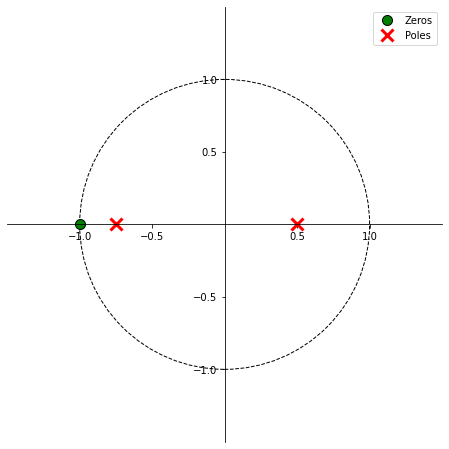

In [14]:
# get a figure/plot
fig, ax = plt.subplots(figsize = (16,8))

# create the unit circle
uc = patches.Circle((0,0), radius=1, fill=False,
                    color='black', ls='dashed')
ax.add_patch(uc)
    
# Plot the zeros and set marker properties    
t1 = plt.plot(zeros.real, zeros.imag, 'go', ms=10)
plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
          markeredgecolor='k', markerfacecolor='g')

# Plot the poles and set marker properties
t2 = plt.plot(poles.real, poles.imag, 'rx', ms=10)
plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
          markeredgecolor='r', markerfacecolor='r')



ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# set the ticks
r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
ax.legend(('Zeros', 'Poles'))

plt.show()